<a href="https://colab.research.google.com/github/Bhavin52/Deep_learning/blob/main/neural_networks_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow

You should consider upgrading via the '/Users/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# GD

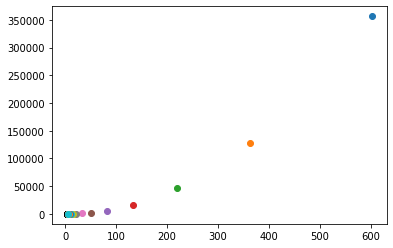

In [3]:
x=np.linspace(4,6,20)
y=(x-5)**2
plt.scatter(x,y,color="black")
starting_point=1000
updated_point=starting_point
l=[]
for i in range(100):
    eta=-0.2
    updated_point=updated_point+eta*2*(updated_point-5)
    l.append(updated_point)
    plt.scatter(updated_point,(updated_point-5)**2)
    

In [4]:
l

[602.0,
 363.2,
 219.92,
 133.952,
 82.37119999999999,
 51.42271999999999,
 32.85363199999999,
 21.712179199999994,
 15.027307519999997,
 11.016384511999998,
 8.609830707199999,
 7.165898424319999,
 6.299539054592,
 5.779723432755199,
 5.46783405965312,
 5.280700435791871,
 5.168420261475123,
 5.101052156885074,
 5.060631294131045,
 5.036378776478627,
 5.021827265887176,
 5.013096359532306,
 5.007857815719384,
 5.004714689431631,
 5.0028288136589785,
 5.001697288195387,
 5.001018372917232,
 5.00061102375034,
 5.000366614250204,
 5.000219968550122,
 5.000131981130074,
 5.000079188678044,
 5.000047513206827,
 5.000028507924096,
 5.000017104754457,
 5.000010262852674,
 5.000006157711605,
 5.000003694626963,
 5.000002216776178,
 5.0000013300657065,
 5.000000798039424,
 5.0000004788236545,
 5.000000287294193,
 5.000000172376516,
 5.00000010342591,
 5.000000062055546,
 5.0000000372333275,
 5.0000000223399965,
 5.000000013403998,
 5.000000008042399,
 5.00000000482544,
 5.000000002895264,
 5.0

In [5]:
#linear reg implement 

# perceptron 

 ![perceptron%20pic.jpeg](attachment:perceptron%20pic.jpeg)

In [6]:
class Perceptron():

    def __init__(self, no_of_inputs, threshold=10000, learning_rate=0.001):
        self.threshold = threshold
        self.learning_rate = learning_rate
        self.weights = np.zeros(no_of_inputs + 1)
           
    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        if summation > 0:
          activation = 2
        else:
          activation = 1         
        return activation
    def predict_batch(self,inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return np.where(summation>0,2,1)
    

    def train(self, training_inputs, labels):
                for _ in range(self.threshold):
                    for inputs, label in zip(training_inputs, labels):
                        prediction = self.predict(inputs)
                        self.weights[1:] += self.learning_rate * (label - prediction) * inputs
                        self.weights[0] += self.learning_rate * (label - prediction)


In [7]:
data=pd.read_csv("/content/fun-data.csv")

In [8]:
data.head()

,f1,f2,f3,class
0,8.477937,0.436289,40.389470,1
1,6.704407,6.237227,65.349761,1
2,4.835130,4.500931,52.093300,1
3,5.179056,9.523951,79.049424,1
4,5.030426,4.569668,51.970028,1


In [9]:
data["class"].value_counts()

1    100
2    100
Name: class, dtype: int64

In [10]:
perceptron = Perceptron(no_of_inputs=3)
perceptron.train(data.iloc[:,:-1].values,np.array(data.iloc[:,-1]))

In [11]:
perceptron.weights

array([ 1.532     ,  0.384272  ,  0.64909767, -0.12957911])

In [12]:
from sklearn import metrics

In [13]:
metrics.accuracy_score(perceptron.predict_batch(data.iloc[:,:-1].values),np.array(data.iloc[:,-1]))

1.0

# PERCERPTRON FOR logisticdrawback.csv

In [14]:
from sklearn.linear_model import Perceptron

In [15]:
data=pd.read_csv("/content/logisticdrawback.csv")

In [16]:
data

,f1,f2,class
0,-1.335474,1.376236,1
1,-1.918388,-0.528479,1
2,0.015120,0.020986,1
3,-0.131351,0.119043,1
4,0.794606,1.421984,1
...,...,...,...
295,-0.413737,-8.881763,3
296,-6.280134,4.969648,3
297,-0.946822,9.196240,3
298,-6.139916,5.699856,3


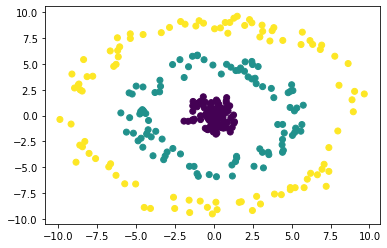

In [17]:
plt.scatter(data.f1,data.f2,c=data["class"])

In [18]:
model=Perceptron()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1],data.iloc[:,-1] ,test_size=0.3, shuffle=True) 

In [20]:
model.fit(X_train,y_train)

Perceptron()

In [21]:
metrics.accuracy_score(model.predict(data.iloc[:,:-1].values),np.array(data.iloc[:,-1]))

0.34

In [22]:
data=pd.read_csv("logisticdrawback.csv")

In [23]:
perceptron.weights

array([ 1.532     ,  0.384272  ,  0.64909767, -0.12957911])

# MLP

# logistic regression with mlp

![Screenshot%202019-11-28%20at%209.32.46%20PM.png](attachment:Screenshot%202019-11-28%20at%209.32.46%20PM.png)

In [24]:
import seaborn as sns 
iris=sns.load_dataset("iris")
def f(x):
    if x=="setosa":
        return 0
    if x=="versicolor":
        return 1
    if x=="virginica":
        return 2
iris["species"]=iris["species"].apply(f)

In [25]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [26]:
import tensorflow as tf

# Generate dummy data
import numpy as np
# x_train = np.random.random((120, 4))
# y_train = keras.utils.to_categorical(np.random.randint(3, size=(120, 1)), num_classes=3)
# x_test = np.random.random((30, 4))
# y_test = keras.utils.to_categorical(np.random.randint(3, size=(30, 1)), num_classes=3)
x_train,x_test,y_train,y_test=train_test_split(iris.iloc[:,:4],iris.iloc[:,-1], test_size=0.2)
y__test = tf.keras.utils.to_categorical(y_test)
y__train = tf.keras.utils.to_categorical(y_train)


model = tf.keras.models.Sequential()
# Dense(64) is a fully-connected layer with 64 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 20-dimensional vectors.
#model.add(Dense(10, activation='relu',input_dim=4))


model.add(tf.keras.layers.Dense(3, activation='softmax',input_dim=4))
#model.add(Dropout(0.5))
#model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(3, activation='softmax'))

sgd =  tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

model.fit(x_train.values, y__train,
          epochs=20,
          batch_size=32)
score = model.evaluate(x_test, y__test)

Epoch 1/20
4/4 [==============================] - 1s 4ms/step - loss: 7.5107 - accuracy: 0.3417
Epoch 2/20
4/4 [==============================] - 0s 3ms/step - loss: 2.7967 - accuracy: 0.3000
Epoch 3/20
4/4 [==============================] - 0s 3ms/step - loss: 1.9425 - accuracy: 0.4333
Epoch 4/20
4/4 [==============================] - 0s 3ms/step - loss: 1.5101 - accuracy: 0.4417
Epoch 5/20
4/4 [==============================] - 0s 3ms/step - loss: 0.8541 - accuracy: 0.4917
Epoch 6/20
4/4 [==============================] - 0s 3ms/step - loss: 0.7171 - accuracy: 0.5833
Epoch 7/20
4/4 [==============================] - 0s 3ms/step - loss: 0.5901 - accuracy: 0.7417
Epoch 8/20
4/4 [==============================] - 0s 3ms/step - loss: 0.5486 - accuracy: 0.8750
Epoch 9/20
4/4 [==============================] - 0s 3ms/step - loss: 0.5134 - accuracy: 0.7917
Epoch 10/20
4/4 [==============================] - 0s 3ms/step - loss: 0.4878 - accuracy: 0.8000
Epoch 11/20
4/4 [======================

In [27]:
score 

[0.37474995851516724, 0.8999999761581421]

In [33]:
weights = model.layers[0].get_weights()[0]
biases = model.layers[0].get_weights()[1]

In [34]:
weights

array([[ 0.36099458,  0.03599107, -0.5252543 ],
       [ 0.7683004 , -0.13818987, -0.47500008],
       [-1.1454546 ,  0.6551966 ,  1.429049  ],
       [ 0.21843773, -0.12137157,  0.52630466]], dtype=float32)

In [35]:
biases

array([ 0.27709287, -0.11197317, -0.1651198 ], dtype=float32)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


In [38]:
l=LogisticRegression()
l.fit(x_train, y_train)

LogisticRegression()

In [39]:
l.intercept_

array([  9.14328081,   1.83049575, -10.97377656])

In [40]:
l.coef_

array([[-0.37753544,  0.92301346, -2.38143248, -0.97660012],
       [ 0.53704616, -0.30910602, -0.19922406, -0.81856489],
       [-0.15951072, -0.61390744,  2.58065653,  1.79516501]])

In [41]:
l=LogisticRegression()
l.fit(x_train,y_train)
confusion_matrix(y_test,l.predict(x_test))

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [42]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# problems with traditional ann

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

11501568/11490434 [==============================] - 0s 0us/step


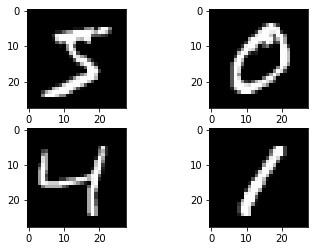

In [44]:
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [45]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [46]:
X_train.shape

(60000, 28, 28)

In [47]:
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0],num_pixels ).astype('float32')
X_test = X_test.reshape(X_test.shape[0],num_pixels).astype('float32')

X_train = X_train / 255
X_test = X_test / 255

In [48]:
X_train.shape

(60000, 784)

In [49]:
# y_train = np_utils.to_categorical(y_train)
# y_test = np_utils.to_categorical(y_test)
# num_classes =10

In [50]:
num_classes=10
num_pixels=784

In [51]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1000, input_dim=num_pixels, activation='relu'))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

In [52]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1000)              785000    
                                                                 
 dense_2 (Dense)             (None, 10)                10010     
                                                                 
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [54]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [55]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=1024, verbose=1)

Epoch 1/10
59/59 [==============================] - 5s 77ms/step - loss: 0.4829 - accuracy: 0.8716 - val_loss: 0.2320 - val_accuracy: 0.9330
Epoch 2/10
59/59 [==============================] - 6s 109ms/step - loss: 0.1984 - accuracy: 0.9450 - val_loss: 0.1659 - val_accuracy: 0.9522
Epoch 3/10
59/59 [==============================] - 7s 113ms/step - loss: 0.1429 - accuracy: 0.9598 - val_loss: 0.1273 - val_accuracy: 0.9632
Epoch 4/10
59/59 [==============================] - 4s 74ms/step - loss: 0.1093 - accuracy: 0.9698 - val_loss: 0.1092 - val_accuracy: 0.9693
Epoch 5/10
59/59 [==============================] - 4s 74ms/step - loss: 0.0866 - accuracy: 0.9763 - val_loss: 0.0964 - val_accuracy: 0.9704
Epoch 6/10
59/59 [==============================] - 4s 74ms/step - loss: 0.0708 - accuracy: 0.9808 - val_loss: 0.0898 - val_accuracy: 0.9726
Epoch 7/10
59/59 [==============================] - 6s 102ms/step - loss: 0.0587 - accuracy: 0.9843 - val_loss: 0.0776 - val_accuracy: 0.9764
Epoch 8/10

In [56]:
(X_train1, y_train), (X_test1, y_test) = tf.keras.datasets.mnist.load_data()


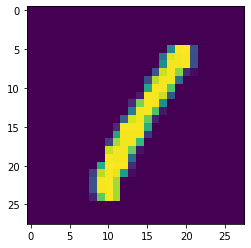

In [57]:
pic=np.zeros((28,28))
pic=X_train1[3,:,:].copy()
pic2=X_train1[3,:,:].copy()
plt.imshow(pic)

In [58]:
np.argmax(model.predict(pic.reshape(1,784)))

1

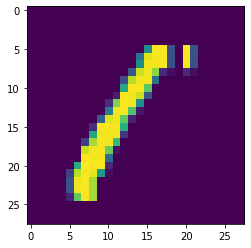

In [59]:
for i in range(pic.shape[0]):
  if i<20:
    pic[:,i]=pic[:,i+3]
plt.imshow(pic)

In [60]:
np.argmax(model.predict(pic.reshape(1,784)))

0

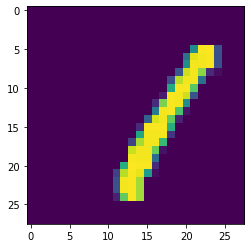

In [61]:
pic=np.zeros((28,28))

for i in range(pic.shape[0]):
  if  (i<25):
    pic[:,i+3]=pic2[:,i]
plt.imshow(pic)

In [62]:
np.argmax(model.predict(pic.reshape(1,784)))

4